# Introduction to Deep Learning in Python

Deep learning is the machine learning technique behind the most exciting capabilities in diverse areas like robotics, natural language processing, image recognition, and artificial intelligence, including the famous AlphaGo. In this course, you'll gain hands-on, practical knowledge of how to use deep learning with Keras 2.0, the latest version of a cutting-edge library for deep learning in Python.

**Instructor:** Dan Becker, contributor to Keras and TensorFlow libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
#import tensorflow.keras
#from tensorflow.keras.layers import Dense
#from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.utils import to_categorical 

In [60]:
def get_new_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return(model)

In [2]:
def show_image(image, title='img', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, original_title, filtered, title_filtered):    
    fig, (ax1, ax2) = plt.subplots(ncols= 2, figsize=(12, 8), sharex= True, sharey= True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title(original_title)
    ax1.axis('off')
    ax2.imshow(filtered, cmap= plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [4]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

In [5]:
#def relu(input):
    #'''Define your relu activatino function here'''
    ## Calculate the value for the output of the relu function: output
    #output = max(0, input)
    
    ## Return the value just calculate
    #return output

# $\star$ Chapter 1: Basics of deep learning and neural networks
In this chapter, you'll become familiar with the fundamental concepts and terminology used in deep learning, and understand why deep learning techniques are so powerful today. You'll build simple neural networks and generate predictions with them.

#### 
* Linear regression does not account for interactions
* Neural networks account for interactions really well
* Deep learning uses especially powerful neural networks; their ability to capture extremely complex interactions allows them to do amazing things with:
    * Text
    * Images
    * Videos
    * Audio
    * Source code
    * Almost anything else

## Forward Propagation
* Below we use forward propagation to feed the input values through the neural network and obtain an output value of **`9`**:

<img src='data/forward_prop.png' width="400" height="200" align="center"/>

* Forward propagation: we moved from the input, on the left, to the output, on the right. 
* Multiply-add process
* Dot product
* Forward propagation for one data point at a time
* Output is the prediction for that data point

#### Forward Propagation Code

```
import numpy as np
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])

output = (hidden_layer_values * weights['output']).sum()
```

In [7]:
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [8]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [9]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


We can check to confirm that each of these array values match those values calculated in the diagram above.

#### Exercises: Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) to your first neural network

<img src='data/ex_1.png' width="400" height="200" align="center"/>

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as `input_data`, and the weights are available in a dictionary called `weights`. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

```
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)
```

In [11]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

9


### Activation functions
* **Identity function:** an activation function that returns the input

#### ReLU function
* Creating this multiply-add process is only half the story for hidden layers
* For neural networks to achieve their maximum predictive power, we must apply something called an **activation function** in the hidden layers
* An **activation function** allows the model to capture non-linearities
* Non-linearities capture patterns like how going from no children to one child may impact your banking transactions differently than going from three children to four.
* If the relationships in the data aren't straight-line relationships, we will need an activation function that captures non-linearities
* Activation functions are applied to node inputs to produce node output
* For a long time **tanh** was the standard activation function, but today **the standard in both industry and research applications is the ReLU or Rectified Linear Activation Function.**

$ReLU(x)$ =
    \begin{cases}
        0 \text{  if x}<0\\
        1 \text{  if x}>= 0\\
    \end{cases}  

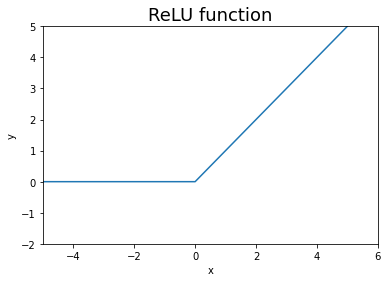

In [12]:
# Plot ReLU function
x=np.arange(-5,6)
y =[]
for i in range(len(x)):
    y.append(max(0,x[i]))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,5])
plt.xlim(-5, 6)
plt.title('ReLU function', fontsize=18)
plt.show()

[Setting xlim, ylim](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/)

* Though **ReLU** has two linear pieces, it is **surprisingly powerful when composed together through multiple successive hidden layers.**

#### Tanh functions

In [13]:
x = np.arange(-5.75,6, 0.25)

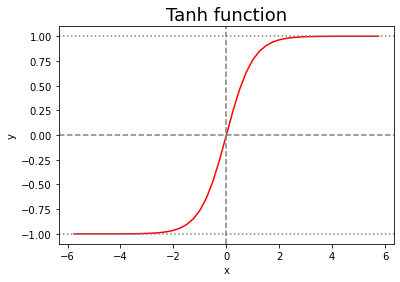

In [14]:
plt.plot(x, np.tanh(x), c='red')
plt.title('Tanh function', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, c='gray', linestyle='--')
plt.axvline(x=0, c='gray', linestyle='--')
plt.axhline(y=-1, c='gray', linestyle='dotted')
plt.axhline(y=1, c='gray', linestyle='dotted')
plt.show()

[Matplotlib linestyle](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

```
import numpy as np
input_data = np.array([2,3])
weights = 'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_1_value = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_outputs = np.array(node_0_output, node_1_output])
output = (hidden_layer_values * weights['output']).sum()
```

In [15]:
input_data = np.array([2,3])
weights = {'node_0': np.array([1, 1]),
          'node_1': np.array([-1, 1]),
          'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
hidden_layer_values = np.array([node_0_value, node_1_value])
hidden_layer_output = np.array([node_0_output, node_1_output])
output = (hidden_layer_output * weights['output']).sum()
print(output)

1.2382242525694254


* The above code is the same code we saw earlier, only we've distinguished the input from the output in each node and we've applied the tanh function to convert the input to the output, giving us a prediction of about **1.2 transactions**.

In [16]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

9


#### Applying the network to many observations/rows of data
You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`. As before, `weights` are also pre-loaded. In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.

```
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
```

### Deeper Networks
* The difference between modern deep learning and the historical neural networks that didn't deliver these amazing results, is the use of models with not just one hidden layer, but with many successive hidden layers
* We forward propagate through these successive layers in a similar way to what we saw for a single hidden layer
<img src='data/multiple_hidden_layers.png' width="400" height="200" align="center"/>
<img src='data/multiple_hidden_layers2.png' width="400" height="200" align="center"/>

* This can scale quite naturally to even a thousand layers or more.
* Note the use of the ReLU function in the lower diagram; any outputs that would have been negative become zero (as per the ReLU definition).


* You use the same forward propagation process, but apply the iterative process more times.

### Representation learning
* Deep networks internally build representations of patterns in the data, making them useful for prediction
* They find increasingly complex patterns as we go through successive hidden layers of the network
* In this way, neural networks partially replace the need for feature engineering or manually creating better predictive features
* Deep learning is also sometimes called representation learning, because subsequent layers build increasingly sophisticatd representations of the raw data, until we get to a stage where we can make predictions
* The "cool" thing about deep learning is that the modeler doesn't need to specify the interactions; we never tell the model to look for diagonal lines, for example
* Instead, when you train the model, the neural network gets weights that find the relevant patterns to make better predictions

```
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)
```

# $\star$ Chapter 2: Optimizing a neural network with backward propagation
Learn how to optimize the predictions generated by your neural networks. You'll use a method called backward propagation, which is one of the most important techniques in deep learning. Understanding how it works will give you a strong foundation to build on in the second half of the course.

### The need for optimization
* The mere fact that a model has the structure of a neural network does not guarantee that it will make good predictions

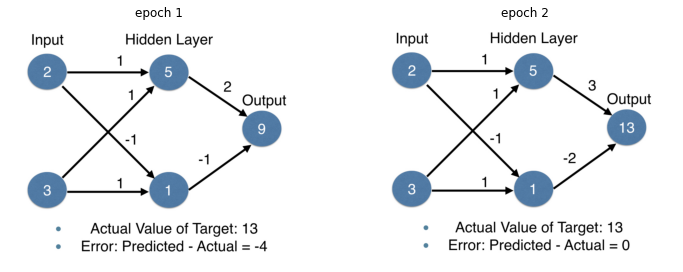

In [18]:
plot_comparison(plt.imread('data/1.png'), "epoch 1", plt.imread('data/2.png'), "epoch 2")

* Above, not how the change in weights improved the model for this particular data point (which we now know is `13`).


#### Predictions with multiple points
* Making accurate predictions gets harder with multiple points.
* At any set of weights, there are many values of the error
* ...corresponding to the many points we make predicitons for 

#### Loss function
* Aggregates error in predictions from many data points into a single number
* Measure of a model's predictive performance
* For example, a common loss function for a regression task is MSE

<img src='data/loss_func_weights.png' width="600" height="300" align="center"/>

* Consider a model with only two weights, illustrated above.
* Lower loss function values mean a better model
* Goal: Find the weights that give the lowest value for the loss function
* We do this with gradient descent

#### Gradient descent steps
* Start at random point
* Until you are somewhere flat:
    * Find the slope
    * Take a step downhill
    
```
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [-1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = target_actual - model_output_1

# Print error_0 and error_1
print(error_0)
print(error_1)
```

#### Exercises: Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as `weights_0` and `weights_1`.

`input_data` is a list of arrays. Each item in that list contains the data to make a single prediction. `target_actuals` is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the `mean_squared_error()` function from `sklearn.metrics`. It takes the true values and the predicted values as arguments.

You'll also use the preloaded `predict_with_network()` function, which takes an array of data as the first argument, and weights as the second argument.

```
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)
```

### Gradient Descent
* If the slope is positive:
    * Going oppposite the slope means moving to lower numbers
    * Subtract the slope from the current value
    * Too big a step might lead us astray
* Solution: **learning rate**
    * Update each weight by subtracting `learning rate * slope`
    * Learning rates are frequently around `0.01`
    * This ensures we take small steps, so we reliably move towards the optimal weights
    
#### Code to calculate slopes and update weightsdc

```
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

gradient = 2 * input_data * error
gradient

weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)
```

In [20]:
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [21]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [22]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


#### Exercises: Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is `2 * x * (xb-y)`, or `2 * input_data * error`. Note that `x` and `b` may have multiple numbers (`x` is a vector for each data point, and `b` is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called `weights` as well as data for a single point called `input_data`. The actual value of the target you want to predict is stored in `target`.

```
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)
```

In [23]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[30 40]


```
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated -target

# Print the original error
print(error)

# Print the updated error
print(error_updated)
```

In [25]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights-(learning_rate * slope)

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated -target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

5
2.5


```
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse
```

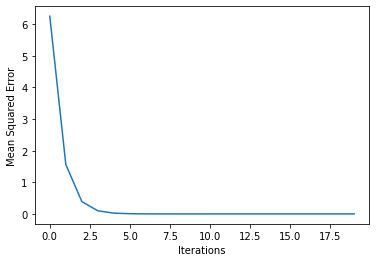

In [26]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Backpropagation
* Just as forward propagation sends input data through the hidden layers and into the output later, **backpropagation** takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer.

<img src='data/backprop.png' width="400" height="200" align="center"/>

* Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
* Comes from chain rule of calculus
* Important to understand the process, but you will generally use a library that implements this

#### Backpropagation process
* Trying to estimate the slope of the loss function w.r.t each weight.
* Do forward propagation to calculate predictions and errors (*before* we do backpropagation).
* Go back one layer at a time
* Gradients for weight is product of:
    * Node value feeding into that weight
    * Slope of loss function w.r.t node it feeds into
    * Slope of activation function at the node it feeds into
* Need to also keep track of the slopes of the loss function w.r.t node values
* Slope of node values are the sum of the slopes for all weights that come out of them

#### Stochastic gradient descent
* It is common to calculate slopes on only a subset of the data ( a **batch**)
* Use a different batch of data to calculate the next update
* Start over from the beginning once all data is used
* Each time through the training data is called an **epoch**
* When slopes are calculated on one batch at a time: **stochastic gradient descent**

# $\star$ Chapter 3: Building deep learning models with keras
In this chapter, you'll use the Keras library to build deep learning models for both regression and classification. You'll learn about the Specify-Compile-Fit workflow that you can use to make predictions, and by the end of the chapter, you'll have all the tools necessary to build deep neural networks.

## Creating a keras model
* Now we'll learn how to create and optimize networks using the Keras interface to the TensorFlow deep learning library

### Model building steps
* **Specify architecture:**
    * How many layers do you want?
    * How many nodes in each layer?
    * What activation function do you want to use in each layer?
* **Compile:**
    * Specify the loss function
    * Specify some details about how optimization works
* **Fit:**
    * Cycle of back-propagation and optimization of model weights with your data
* **Predict:**
    * Make predictions!
    
#### Model specification

```
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

predictors = np.loadtxt('predictors_data.csv', delimiter',')
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

* Second block reads in the data
* We read the data here so we can find the number of nodes in the input layer
* The number of nodes in the input layer is stored as the variable `n_cols`
* We always need to specify how many collumns are in the input when building a Keras model, because that is the number of nodes in the input layer

* Third block begins building up the model
* There are two ways to build up a model, and we'll focus on **sequential**, which is the easier way to build a model 
* **Sequential models** require that each layer as weights or connections only to the one layer coming directly after it in the network diagram. 
* We start adding layers using the `add` method of the model
* The standard layer type (and the one we have seen thus far) is called a **Dense** layer
    * It is called Dense (or **fully-connected**) because all of the nodes in the previous layer connect to all of the nodes in the current layer
    * As you advance in deep learning, you may start using layers that aren't Dense
* In each layer, we specify the number of nodes as the first positional argument, and the activation function we want to use in that layer using the keyword argument `activation`.
* Keras supports every activation function you will want in practice
* In the first layer, we need to specify input shapes as shown above.
    * That says the input will have `n_cols` columns, and there is nothing after the comma, meaning it can have any number of rows (that is, any number of data points)
* Notice that the last layer has one node
    * That is the output layer and it matches those diagrams where we ended with only a single node as the output or prediction of the model. 
* This model has two hidden layers and an output layer
* Note that here each layer has 100 nodes; Keras and TensorFlow do the math for us, so don't feel afraid to use much bigger networks than we've seen before. It's quite common to use 100s or 1000s of nodes in a layer.

In [28]:
predictors = np.loadtxt('data/predictors.csv', delimiter=',', skiprows=1)
n_cols = predictors.shape[1]
n_cols

10

In [40]:
# Import necessary modules
#import tensorflow.keras
#from keras.layers import Dense
#from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = tf.keras.Sequential()

# Add the first layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(1))

### Compiling and fitting a model 
* After you've specified a model, the next task is to compile it, which sets up the network for optimization 
    * For instance, creating an internal function to do backpropagation efficiently
    
#### Why you need to compile your model 
* The **`compile`** method has two important arguments:
    * Specify the $\star$ **`optimizer`** $\star$
        * controls the **learning rate**
        * in practice, the right choice of learning rate can make a big difference for how quickly our model finds good weights, and even how good a set of weights it can find
        * There are a few algorithms that automatically tune the learning rate
        * Many options, and mathematically complex
        * [More on optimizers here](https://keras.io/api/optimizers/#adam)
        * Even many experts in the field don't know all the details of all the optimization algorithms
        * Pragmatic approach: **choose a versatile algorithm and use that for most problems.**
        * **`Adam`** is an **excellent choice as your go-to optimizer.** [Here for more on Adam](https://arxiv.org/abs/1412.6980v8)
            * Adam adjusts the learning rate as it does gradient descent, to ensure reasonable values through out the weight optimization process
    * Specify the $\star$ **`loss function`** $\star$
        * **`mean_squared_error`** is the most common for **regression** problems
   
### Compiling a model in code:

```
n_cols = predictors.shape[1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
```

* As seen, we add a compile command after building the model
* After compiling the model, we can fit it

### Fitting a model
* Fitting = Applying backpropagation and gradient descent with your data to update the weights
* The fit step looks similar to what we've seen in sklearn, but with more options to explore
* **Scaling data before fitting can ease optimization**
    * Common approach: subtract each feature by that feature's mean and divide by its standard deviation
* After `compile` we run `fit`, with the **predictors** as the first argument and the **target** as the second argument.

```
n_cols = predictors.shape[1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(predictors, target)
```

## Classification models
* Deep learning works similarly for classifiction (that is, predicting outcomes from a set of discrete options)
* **`categorical_crossentropy`** loss function 
    * $\Rightarrow$ this isn't the only loss function for classification problems, but it is by far the most common
    * **Similar to log loss**: lower is better
    * Lower is better, but the results of `categorical_crossentropy` can still be difficult to interpret, so we make sure to add:
    * Add **`metrics = ['accuracy']`** so that we print out the accuracy score at the end of each epoch, which makes it easier to see and understand the model's progress
    * **The output (last) layer must be modified:**
        * Output layer must have a separate node for each possible outcome
        * Must use **`softmax`** activation
    * The `softmax` activation function ensures the predictions sum to 1, so they can be interpreted like probabilities
    * **You will have a separate node in the output for each possible class**
    
    <img src='data/transform_to_cat.png' width="400" height="200" align="center"/>
 
* This is also referred to as **one-hot-encoding** (explained in depth in another notebook in this repo)

```
from keras.utils.np_utils import to_categorical

data = pd.read_csv('basketball_shot_log.csv')
predictors = data.drop(['shot_result'], axis = 1).as_matrix()
target = to_categorical(data.shot_result)

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target)
```

* **Note that the last layer has 2 nodes, for each of the two possible outcomes:** scored a point or didn't score a point

#### Exercises: Understanding your classification data
Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as `age`, `fare` and where each passenger embarked from to predict who will survive. This data is from a [tutorial on data science competitions](https://www.kaggle.com/c/titanic). Look [here](https://www.kaggle.com/c/titanic/data) for descriptions of the features.

It's smart to review the maximum and minimum values of each variable to ensure the data isn't misformatted or corrupted. What was the maximum age of passengers on the Titanic? Use the `.describe()` method in the IPython Shell to answer this question.

In [43]:
df = pd.read_csv('data/titanic.csv')

In [44]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [45]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


**ANSWER:** The maximum age was **80**

#### Last steps in classification models
You'll now create a classification model using the titanic dataset.

Here, you'll use the `sgd` optimizer, which stands for [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). You'll learn more about this in the next chapter!

In [46]:
predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = df.survived.astype(np.float32).to_numpy()
n_cols = predictors.shape[1]

In [50]:
# from tensorflow.keras.utils import to_categorical
target = to_categorical(target)

In [58]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, epochs = 10)

Epoch 1/10
28/28 [==============================] - 0s 658us/step - loss: 2.4876 - accuracy: 0.5967
Epoch 2/10
28/28 [==============================] - 0s 581us/step - loss: 0.7582 - accuracy: 0.6309
Epoch 3/10
28/28 [==============================] - 0s 556us/step - loss: 0.6554 - accuracy: 0.6634
Epoch 4/10
28/28 [==============================] - 0s 581us/step - loss: 0.6473 - accuracy: 0.6361
Epoch 5/10
28/28 [==============================] - 0s 634us/step - loss: 0.6285 - accuracy: 0.6823
Epoch 6/10
28/28 [==============================] - 0s 703us/step - loss: 0.6512 - accuracy: 0.6665
Epoch 7/10
28/28 [==============================] - 0s 702us/step - loss: 0.5784 - accuracy: 0.6990
Epoch 8/10
28/28 [==============================] - 0s 607us/step - loss: 0.5823 - accuracy: 0.7039
Epoch 9/10
28/28 [==============================] - 0s 643us/step - loss: 0.5957 - accuracy: 0.6924
Epoch 10/10
28/28 [==============================] - 0s 657us/step - loss: 0.6033 - accuracy: 0.6985

[See here](https://www.py4u.net/discuss/223926) for this particular warning's explanation.

**This very simple model has an accuracy of almost 70%**

## Using models
* In order to use these models:
    * **Save** a model after you've trained it
    * **Reload** that model
    * **Make predictions** with the model
    
#### Saving, reloading and using your Model

```
from keras.models import load_model
model.save('model_file.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]
```
* **Models are saved in a format called hdf5, for which h5 is the common extension.**
* The predictions come in the same format as the prediction target
* Sometimes I'll want to verify that the model I loaded has the same structure I expect:

* **`my_model.summary()`**

* You can print out a summary of the model architecture with the `summary` method

```
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)
```

# $\star$ Fine-tuning keras models
Learn how to optimize your deep learning models in Keras. Start by learning how to validate your models, then understand the concept of model capacity, and finally, experiment with wider and deeper networks.

## Understanding model optimization
* Model optimization is difficult:
    * The optimal value for any one weight depends on the values of the other weights, and we are optimizing many weights at once
    * Simultaneously optimizing 1000s of parameters with complex relationships
    * Even if the slope tells us which weights to increase, and which to decrease, our updates may not improve our model meaningfully
    * Updates too small (if learning rate is too low) or too large (if learning rate is high)
    * A smart optimizer like Adam helps, but optimization problems can still occur
    * The easiest way to see the effect of different learning rates is to use the simplest optimizer: Stochastic Gratient Descent, sometimes abbreviated to `SGD`

```
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)
```

```
def get_new_model(input_shape = input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(100, activation='relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))
    return(model)
    
lr_to_test = [.000001, 0.01, 1]

# loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss = 'categorical_crossentropy')
    model.fit(predictors, target)
```

#### The dying neuron problem
* This problem occurs when a neuron takes a value less than 0 for all rows of your data
* Recall that, with the ReLU activation function, any node with a negative input value produces an output of 0, and it also has a slope of zero
* Because the slope is zero, the slope of any weights flowing into that node are also zero, so those weights don't get updated
* In other words, once the node starts always getting negative inpus, it may continue to only get negative inputs.
* It's contributing nothing to the model at this point, and hence the claim that the node or neuron is "dead."
* At first, this may suggest using an activation function whose slope is never exactly zero **however** this introduces the problem of **vanishing gradients**

#### Vanishing gradients
* Occurs when many layers have very small slopes (e.g. due to being on a flat part of a tanh curve)
* A small but non-zero slope might work in a network with only a few hidden layers, but in a deep network, one with many layers, the repeated multiplication of small slopes causes the slopes to get close to 0, which meant updates in backpropagation were close to 0
* This in turn might suggest using an activation function that isn't even close to flat anywhere
    * There is research in this area, including on variations on ReLU
* If you're ever wondering why your model isn't training better, changing the activation function may be the solution

```# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epoch=10)
```

### Model validation
* Recall that your model's performance on the training data is not usually a good indication of how it will perform on new data and for this reason we use validation data to test model performance
* **Validation data** is data that is explicitly held out from training, and used only to test model performance

#### Validation in deep learning
* Commonly use validation split rather than cross-validation
* We don't typically use k-fold cross validation on deep learning models because deep learning is typically used on large datasets
* Deep learning widely used on large datasets
* The computational expense of running k-fold validation would be... large
* Single validation score is based on large amoun of data, and is reliable
* Keras makes it easy to use some of your data as validation data

#### Model validation with keras

```
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)
```

* We can make small changes in both the compile and fit steps to see model validation info

#### Early Stopping
* **Our goal is to have the best validation score possible, so we should keep training while our validation score is improving, and then stop training when the validation score isn't improving.**
* We do this with **Early Stopping**

```
from keras.callbacks import Early Stopping

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, nb_epoch=20, callbacks= [early_stopping_monitor])
```
* **Note:** must create an "early stopping monitor" **before** fitting the model.
* **`patience`** is how many epochs the model can go without improving before we stop training 
    * 2 or 3 are reasonable values for patience
* **Notice** that `callbacks` takes a list. You may consider adding other callbacks as you become very advanced.
* By default, keras trains for 10 epochs (??)
* With smart logic for determining when to stop, we can set a higher maximum number of epochs
* Keras will go until this number of epochs, unless the validation loss stops improving for the length of your `patience` argument, in which case it will stop earlier

```
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split = 0.3, nb_epochs = 30, callbacks=[early_stopping_monitor])
```

```
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
```

```
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
```

#### Thinking about model capacity
* It takes some practice to get an intuition for what experiment or architectures to try
* There is still a little more "art" (i.e. "not-science") to finding good deep learning architectures than there is for tuning other machine learning algorithms
* But, something called **model capacity** should be one of the key considerations you think about when deciding which models to try.
* **Model capacity** or **Network capacity** is closely related to the terms of overfitting and underfitting.
* Because we want to do well on new datasets that weren't used for training the model, **our validation score is the ultimate measure of a model's predictive quality in deep learning.**

#### Model capacity
* **Model capacity** is a model's ability to capture predictive patterns in your data.
* If you had a network and you increased the number of nodes or neurons in a hidden layer, that would increase model capacity
* If you add layers, that also increases capacity
* **Making larger layers (more nodes) or increasing the number of layers moves you further to the right of this graph:**

<img src='data/overfitting.png' width="400" height="200" align="center"/>

#### Workflow for optimizing model capacity
* Start with a simple network and get the validation score
* Then keep adding capacity as long as the score keeps improving
* Once it stops improving, you can decrease capacity slightly, but you are probably near the ideal

#### Stepping up to images

```
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)
```

In [ ]:
<img src='data/whats_for_dinner.png' width="400" height="200" align="center"/>